## Merging DataFrames in Pandas

In this notebook, we will explore how to merge DataFrames in pandas using various techniques and options, such as `merge()`, `join()`, and `concat()`. Understanding how to combine data from multiple sources is essential when working with large datasets.

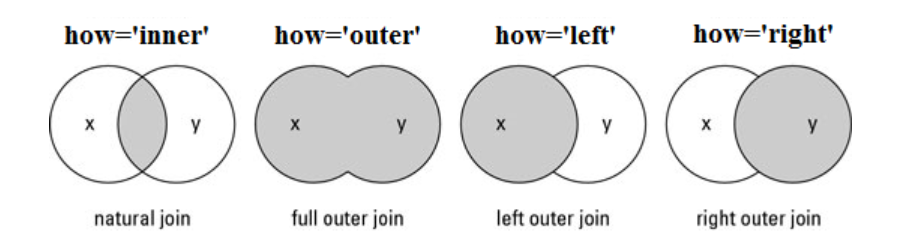

### Importing the Data

First, let's import the pandas library and load two CSV files into DataFrames.


In [27]:
import pandas as pd 

df1 = pd.read_csv(r"C:\Users\user\Desktop\studying\1- python\pandas\dummy data\LOTR.csv")
df2 = pd.read_csv(r"C:\Users\user\Desktop\studying\1- python\pandas\dummy data\LOTR 2.csv")

print(df1)
print(df2)

   FellowshipID FirstName     Skills
0          1001     Frodo     Hiding
1          1002   Samwise  Gardening
2          1003   Gandalf     Spells
3          1004    Pippin  Fireworks
   FellowshipID FirstName   Age
0          1001     Frodo    50
1          1002   Samwise    39
2          1006   Legolas  2931
3          1007    Elrond  6520
4          1008  Barromir    51


We have loaded two datasets, `df1` and `df2`, that contain information on different members of the Fellowship of the Ring.

### Merge with Default (Inner Join)

We begin by using the `merge()` function with the default setting, which performs an **inner join**. An inner join combines rows from both tables that have matching values in the specified column(s).

In [28]:
df1.merge(df2)  # Since we used df1 first, it automatically becomes the left table

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39


This is the same as:


In [29]:
df1.merge(df2, how='inner')

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39


By default, pandas performs an inner join on columns with the same name in both DataFrames. The result will only include rows with matching values in these columns.

### Specifying the Key Column for the Merge

If the columns to merge on have different names in the two DataFrames, you can specify the column names using the `on` parameter:



In [30]:
df1.merge(df2, how='inner', on='FellowshipID')

,FellowshipID,FirstName_x,Skills,FirstName_y,Age
0,1001,Frodo,Hiding,Frodo,50
1,1002,Samwise,Gardening,Samwise,39


Here, we explicitly tell pandas to merge the DataFrames based on the `FellowshipID` column.

### Handling Multiple Key Columns

If there are multiple columns you want to use for merging, you can pass a list to the `on` parameter:



In [31]:
df1.merge(df2, how='inner', on=['FellowshipID', 'FirstName'])

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39


### Outer Join

An **outer join** returns all rows from both DataFrames, and where there are no matches, it fills the missing values with `NaN`:


In [32]:
df1.merge(df2, how='outer')

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50.0
1,1002,Samwise,Gardening,39.0
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN
4,1006,Legolas,NaN,2931.0
5,1007,Elrond,NaN,6520.0
6,1008,Barromir,NaN,51.0


### Left Join

A **left join** returns all rows from the left DataFrame (`df1`) and only matching rows from the right DataFrame (`df2`):


In [33]:
df1.merge(df2, how='left')

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50.0
1,1002,Samwise,Gardening,39.0
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN


### Cross Join

A **cross join** performs a Cartesian product between the two DataFrames. It compares each row of the left DataFrame with each row of the right DataFrame:



In [34]:
df1.merge(df2, how='cross')

,FellowshipID_x,FirstName_x,Skills,FellowshipID_y,FirstName_y,Age
0,1001,Frodo,Hiding,1001,Frodo,50
1,1001,Frodo,Hiding,1002,Samwise,39
2,1001,Frodo,Hiding,1006,Legolas,2931
3,1001,Frodo,Hiding,1007,Elrond,6520
4,1001,Frodo,Hiding,1008,Barromir,51
5,1002,Samwise,Gardening,1001,Frodo,50
6,1002,Samwise,Gardening,1002,Samwise,39
7,1002,Samwise,Gardening,1006,Legolas,2931
8,1002,Samwise,Gardening,1007,Elrond,6520
9,1002,Samwise,Gardening,1008,Barromir,51


### Using Join for Indexes

The `join()` function is better suited for merging DataFrames based on their **indexes**. Here's an example of joining `df1` and `df2` on their index:


In [35]:
df1.join(df2, on='FellowshipID', how='outer', lsuffix='_left', rsuffix='_right')

,FellowshipID,FellowshipID_left,FirstName_left,Skills,FellowshipID_right,FirstName_right,Age
NaN,0,NaN,NaN,NaN,1001.0,Frodo,50.0
NaN,1,NaN,NaN,NaN,1002.0,Samwise,39.0
NaN,2,NaN,NaN,NaN,1006.0,Legolas,2931.0
NaN,3,NaN,NaN,NaN,1007.0,Elrond,6520.0
NaN,4,NaN,NaN,NaN,1008.0,Barromir,51.0
0.0,1001,1001.0,Frodo,Hiding,NaN,NaN,NaN
1.0,1002,1002.0,Samwise,Gardening,NaN,NaN,NaN
2.0,1003,1003.0,Gandalf,Spells,NaN,NaN,NaN
3.0,1004,1004.0,Pippin,Fireworks,NaN,NaN,NaN



### Merge vs Join

The main difference between `merge()` and `join()` is that `merge()` is used to combine DataFrames based on columns, while `join()` is more suited to merging DataFrames based on their indexes.

### Using `join()` with Indexes

You can also set the index for the DataFrames before performing the join operation:



In [36]:
df_joined = df1.set_index('FellowshipID').join(df2.set_index('FellowshipID'), lsuffix='_left', rsuffix='_right')
df_joined

,FirstName_left,Skills,FirstName_right,Age
FellowshipID,,,,
1001,Frodo,Hiding,Frodo,50.0
1002,Samwise,Gardening,Samwise,39.0
1003,Gandalf,Spells,NaN,NaN
1004,Pippin,Fireworks,NaN,NaN


### Merge vs Concatenate

While `merge()` and `join()` are used for combining DataFrames based on matching columns or indexes, `concat()` is used to **stack** DataFrames either vertically or horizontally.

Here is how to concatenate `df1` and `df2`:


In [37]:
pd.concat([df1, df2])

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,NaN
1,1002,Samwise,Gardening,NaN
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN
0,1001,Frodo,NaN,50.0
1,1002,Samwise,NaN,39.0
2,1006,Legolas,NaN,2931.0
3,1007,Elrond,NaN,6520.0
4,1008,Barromir,NaN,51.0


This is equivalent to performing a **union** operation in SQL.

You can also specify the `join` parameter to define how to handle the columns:


In [38]:
pd.concat([df1, df2], join='inner')  # Will only keep the columns present in both DataFrames

,FellowshipID,FirstName
0,1001,Frodo
1,1002,Samwise
2,1003,Gandalf
3,1004,Pippin
0,1001,Frodo
1,1002,Samwise
2,1006,Legolas
3,1007,Elrond
4,1008,Barromir


To concatenate along the columns (side-by-side) instead of rows, use `axis=1`:


In [39]:
pd.concat([df1, df2], join='outer', axis=1)  # Joining on the index, rather than the columns

,FellowshipID,FirstName,Skills,FellowshipID,FirstName,Age
0,1001.0,Frodo,Hiding,1001,Frodo,50
1,1002.0,Samwise,Gardening,1002,Samwise,39
2,1003.0,Gandalf,Spells,1006,Legolas,2931
3,1004.0,Pippin,Fireworks,1007,Elrond,6520
4,NaN,NaN,NaN,1008,Barromir,51
